In [14]:
from imports import *


In [3]:
# Đọc dữ liệu từ file xlsx
rfm_scaled_df = pd.read_excel(r"D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\RFM_scaled.xlsx")

# 1. Tìm số lượng k cụm tối ưu

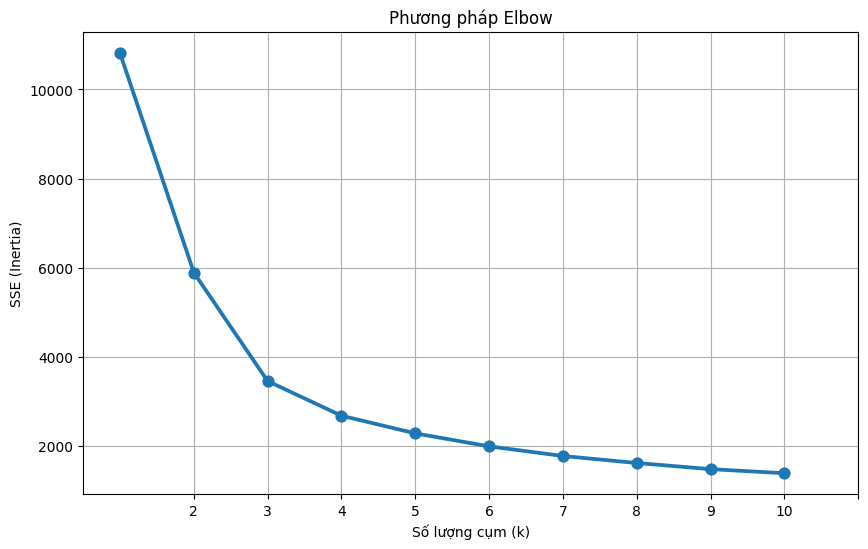

In [4]:
sse = {}
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])  # Sử dụng dữ liệu đã chuẩn hóa
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('SSE (Inertia)')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


# 2. Phân cụm với k = 3

In [13]:
n_clusters = 3  # CHO K = 3
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])

# Gán nhãn cụm
rfm_scaled_df['Cluster'] = model.labels_
print("\nDataFrame RFM với thông tin cụm (k=3):")

# Lưu toàn bộ dữ liệu đã gán cụm vào một file CSV
output_all_clusters_file = r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\all_clusters.csv'
rfm_scaled_df.to_csv(output_all_clusters_file, index=False, encoding='utf-8')
print(f"\nĐã lưu toàn bộ dữ liệu với cụm vào file: {output_all_clusters_file}")

# Lưu từng cụm dữ liệu vào file CSV riêng biệt
for cluster_id in rfm_scaled_df['Cluster'].unique():
    cluster_data = rfm_scaled_df[rfm_scaled_df['Cluster'] == cluster_id]
    output_file = fr'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\cluster_{cluster_id}.csv'
    cluster_data.to_csv(output_file, index=False, encoding='utf-8')
    print(f"\nĐã lưu cụm {cluster_id} vào file: {output_file}")



DataFrame RFM với thông tin cụm (k=3):

Đã lưu toàn bộ dữ liệu với cụm vào file: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\all_clusters.csv

Đã lưu cụm 1 vào file: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\cluster_1.csv

Đã lưu cụm 0 vào file: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\cluster_0.csv

Đã lưu cụm 2 vào file: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\cluster_2.csv


# 3. Trực quan hóa dữ liệu đã phân cụm

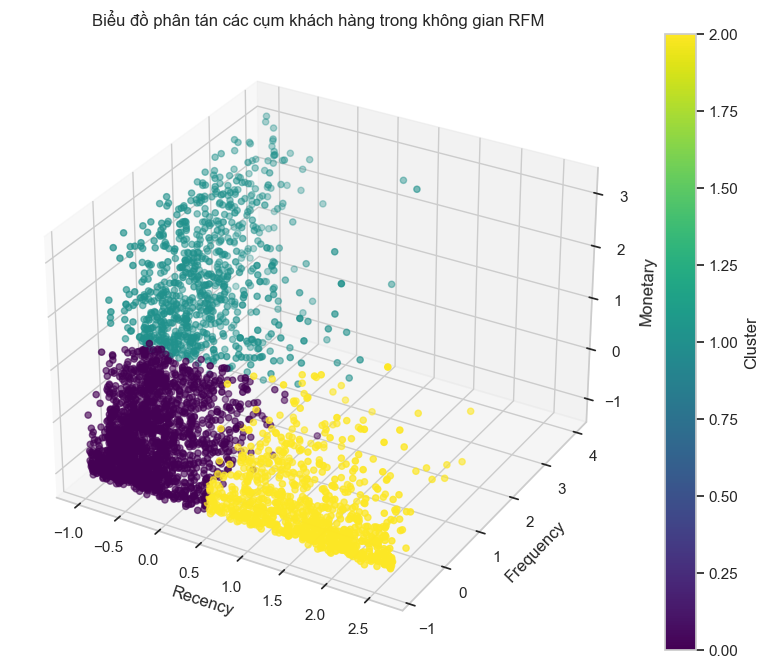

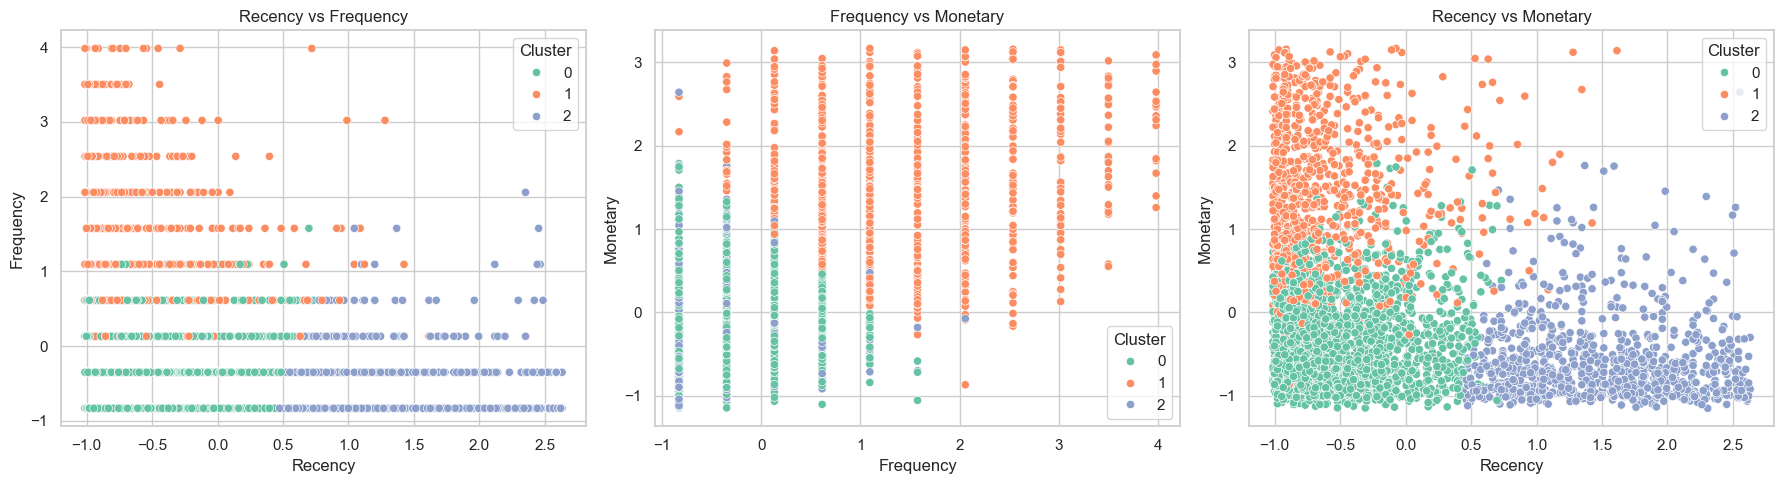

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Vẽ các điểm dữ liệu, màu sắc theo nhãn cụm (Cluster)
scatter = ax.scatter(rfm_scaled_df['Recency'], rfm_scaled_df['Frequency'], rfm_scaled_df['Monetary'],
                   c=rfm_scaled_df['Cluster'], cmap='viridis', marker='o')
# Gán nhãn cho các trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
# Hiển thị thanh màu chú thích cho các cụm
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ phân tán các cụm khách hàng trong không gian RFM')
# Hiển thị biểu đồ
plt.show()

# Đặt style đẹp
sns.set(style="whitegrid")

# Tạo biểu đồ scatter cho từng cặp biến
plt.figure(figsize=(18, 5))

# Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_scaled_df, x='Recency', y='Frequency', hue='Cluster', palette='Set2')
plt.title('Recency vs Frequency')

# Frequency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_scaled_df, x='Frequency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('Frequency vs Monetary')

# Recency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_scaled_df, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('Recency vs Monetary')

plt.tight_layout()
plt.show()

# 4. Phân tích cụm

### 4.1 Trực quan hóa dữ liệu trong mỗi cụm


Số lượng khách hàng trong mỗi cụm:
Cluster
0    1879
1     819
2     906
Name: count, dtype: int64


C:\Users\MIENTRUNG CPT\AppData\Local\Temp\ipykernel_8748\306194768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='viridis')


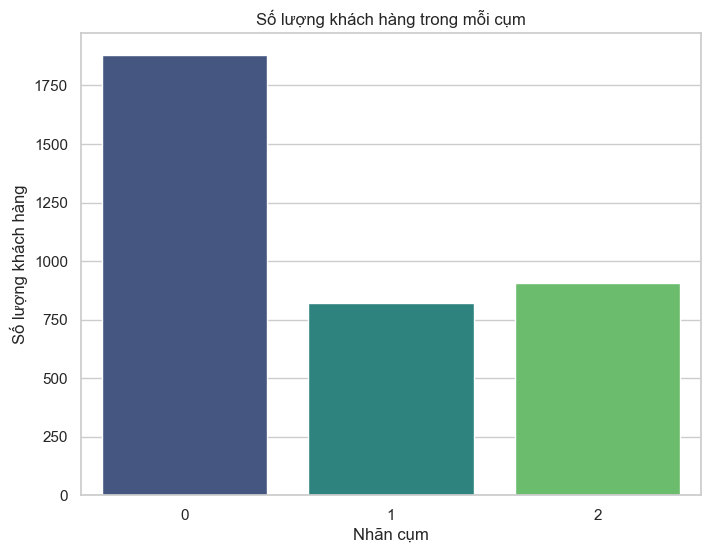

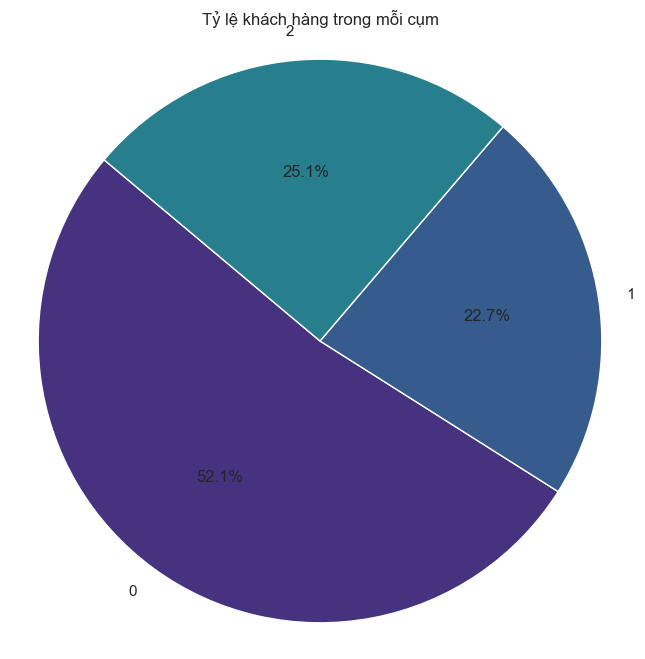

In [8]:
customer_counts = rfm_scaled_df['Cluster'].value_counts().sort_index()
print("\nSố lượng khách hàng trong mỗi cụm:")
print(customer_counts)
# Trực quan hóa số lượng khách hàng trong mỗi cụm bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='viridis')
plt.title('Số lượng khách hàng trong mỗi cụm')
plt.xlabel('Nhãn cụm')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=0)
plt.show()
# Trực quan hóa tỷ lệ khách hàng trong mỗi cụm bằng biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%',
         startangle=140, colors=sns.color_palette('viridis'))
plt.title('Tỷ lệ khách hàng trong mỗi cụm')
plt.axis('equal')
plt.show()


### 4.2 Đọc dữ liệu các cụm

In [9]:
# Đọc dữ liệu từ các file CSV của từng cluster
df0 = pd.read_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\cluster_0.csv')
df1 = pd.read_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\cluster_1.csv')
df2 = pd.read_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Cluster\cluster_2.csv')


### 4.3 Thông tin mô tả các cụm

In [ ]:
print("Cụm 0:")
print(df0.describe())

print("Cụm 1:")
print(df1.describe())

print("Cụm 2:")
print(df2.describe())

Cụm 0:
         CustomerID      Recency    Frequency     Monetary  Cluster
count   1879.000000  1879.000000  1879.000000  1879.000000   1879.0
mean   15339.103779    49.563598     2.028739   556.254733      0.0
std     1712.495840    35.681335     1.053026   359.586720      0.0
min    12349.000000     1.000000     1.000000     6.200000      0.0
25%    13836.500000    20.000000     1.000000   272.055000      0.0
50%    15407.000000    43.000000     2.000000   488.200000      0.0
75%    16806.500000    73.000000     3.000000   765.330000      0.0
max    18282.000000   157.000000     6.000000  2062.060000      0.0


### 4.4 Trực quan hóa cụm 0

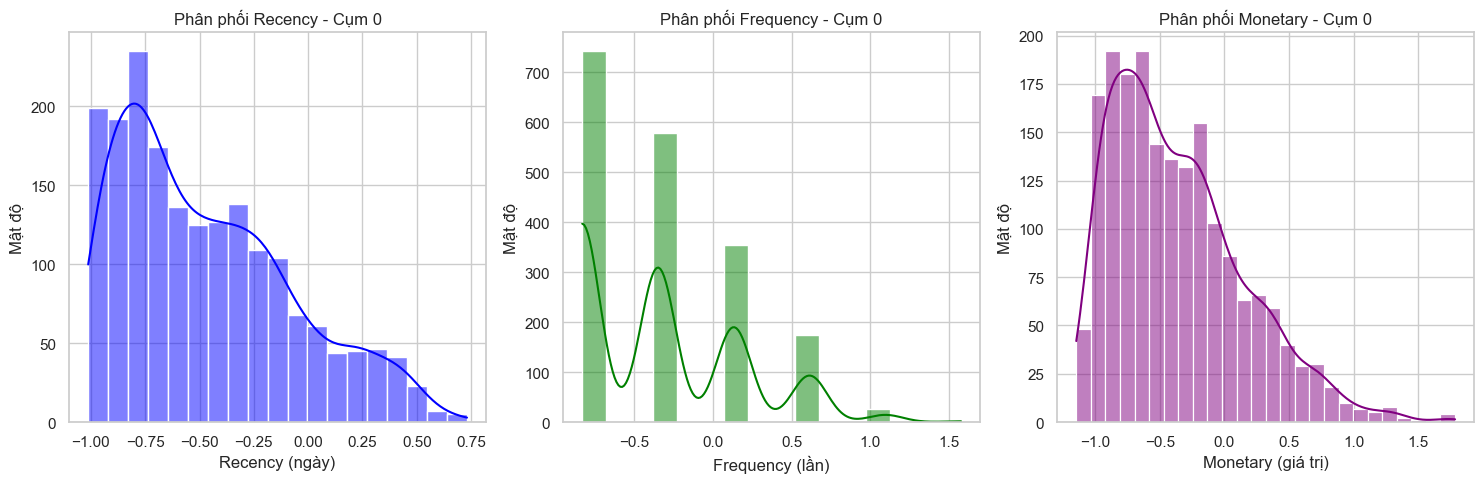

In [10]:
# Thiết lập kích thước đồ thị
plt.figure(figsize=(15, 5))

# Vẽ biểu đồ phân phối cho Recency
plt.subplot(1, 3, 1)
sns.histplot(df0['Recency'], kde=True, color='blue')
plt.title('Phân phối Recency - Cụm 0')
plt.xlabel('Recency (ngày)')
plt.ylabel('Mật độ')

# Vẽ biểu đồ phân phối cho Frequency
plt.subplot(1, 3, 2)
sns.histplot(df0['Frequency'], kde=True, color='green')
plt.title('Phân phối Frequency - Cụm 0')
plt.xlabel('Frequency (lần)')
plt.ylabel('Mật độ')

# Vẽ biểu đồ phân phối cho Monetary
plt.subplot(1, 3, 3)
sns.histplot(df0['Monetary'], kde=True, color='purple')
plt.title('Phân phối Monetary - Cụm 0')
plt.xlabel('Monetary (giá trị)')
plt.ylabel('Mật độ')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

### 4.5 Trực quan hóa cụm 1

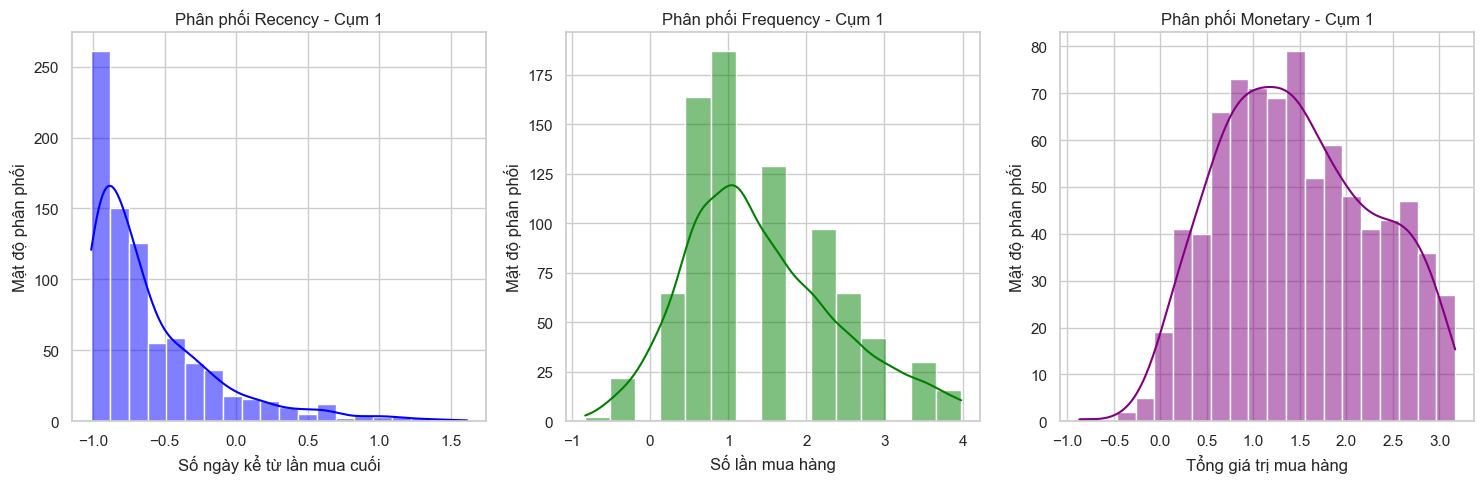

In [11]:
# Thiết lập kích thước tổng thể cho biểu đồ
plt.figure(figsize=(15, 5))

# Biểu đồ phân phối Recency (Độ mới)
plt.subplot(1, 3, 1)
sns.histplot(df1['Recency'], kde=True, color='blue', bins=20)
plt.title('Phân phối Recency - Cụm 1')
plt.xlabel('Số ngày kể từ lần mua cuối')
plt.ylabel('Mật độ phân phối')

# Biểu đồ phân phối Frequency (Tần suất)
plt.subplot(1, 3, 2)
sns.histplot(df1['Frequency'], kde=True, color='green', bins=15)
plt.title('Phân phối Frequency - Cụm 1')
plt.xlabel('Số lần mua hàng')
plt.ylabel('Mật độ phân phối')

# Biểu đồ phân phối Monetary (Giá trị)
plt.subplot(1, 3, 3)
sns.histplot(df1['Monetary'], kde=True, color='purple', bins=20)
plt.title('Phân phối Monetary - Cụm 1')
plt.xlabel('Tổng giá trị mua hàng')
plt.ylabel('Mật độ phân phối')

# Tự động điều chỉnh layout và hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 4.6 Trực quan hóa cụm 2

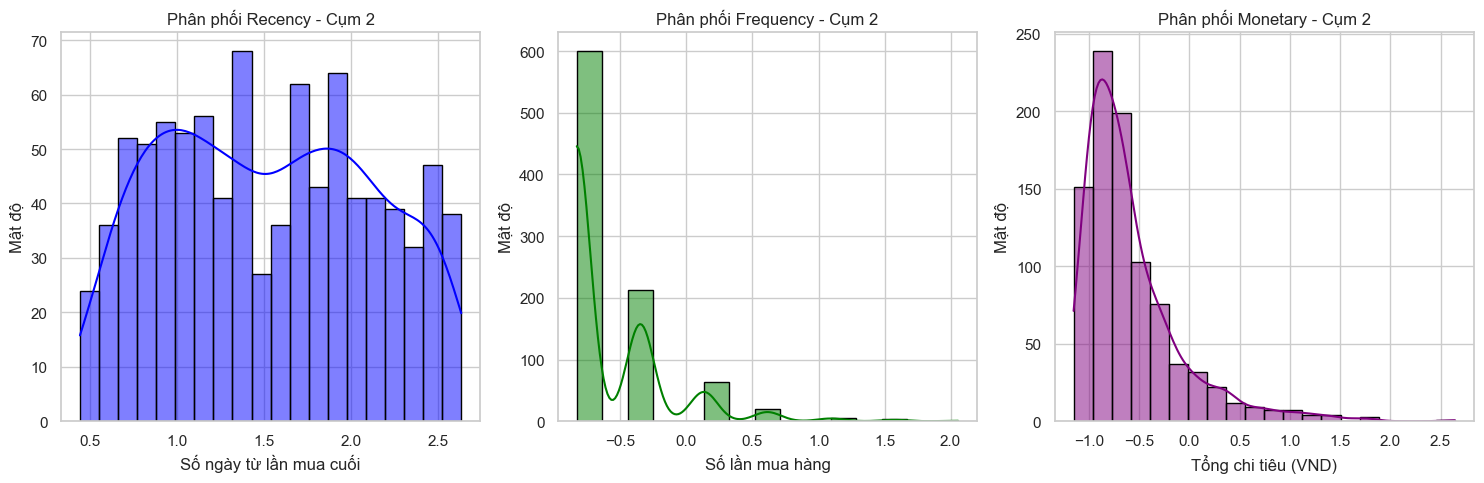

In [12]:
# Thiết lập kích thước tổng thể cho biểu đồ
plt.figure(figsize=(15, 5))

# Biểu đồ phân phối Recency
plt.subplot(1, 3, 1)
sns.histplot(df2['Recency'],
             kde=True,
             color='blue',
             bins=20,
             edgecolor='black')
plt.title('Phân phối Recency - Cụm 2')
plt.xlabel('Số ngày từ lần mua cuối')
plt.ylabel('Mật độ')

# Biểu đồ phân phối Frequency
plt.subplot(1, 3, 2)
sns.histplot(df2['Frequency'],
             kde=True,
             color='green',
             bins=15,
             edgecolor='black')
plt.title('Phân phối Frequency - Cụm 2')
plt.xlabel('Số lần mua hàng')
plt.ylabel('Mật độ')

# Biểu đồ phân phối Monetary
plt.subplot(1, 3, 3)
sns.histplot(df2['Monetary'],
             kde=True,
             color='purple',
             bins=20,
             edgecolor='black')
plt.title('Phân phối Monetary - Cụm 2')
plt.xlabel('Tổng chi tiêu (VND)')
plt.ylabel('Mật độ')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()